# Part-3.2 : Demonstration of Clustering Algorithms on Mopsi Dataset

# Imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# 1. Fetching Mopsi taxi data
- Observed that the dataframe has 101,788 entries, ranging from index 0 to 13466.

In [7]:
mopsi_df = pd.read_csv("MopsiLocationsUntil2012-Finland.txt", sep='\t')
mopsi_df

,625983,297439
0,626146,297440
1,626144,297456
2,626004,297394
3,626018,297437
4,626038,297518
...,...,...
13461,626042,297444
13462,625977,297443
13463,626050,297404
13464,625995,297426


# 2. Displaying information about the Mopsi DataFrame
- Observed that both columns contain integer values, and there are no missing values in any of the entries.

In [8]:
mopsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13466 entries, 0 to 13465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   625983  13466 non-null  int64
 1   297439  13466 non-null  int64
dtypes: int64(2)
memory usage: 210.5 KB


# 3. Descriptive Statistics for Mopsi Taxi Data

In [9]:
mopsi_df.describe()

,625983,297439
count,13466.000000,13466.00000
mean,625094.709936,289004.04270
std,7844.619064,20400.05631
min,599247.000000,212016.00000
25%,625930.000000,296160.00000
50%,626018.000000,297448.00000
75%,626192.000000,297796.75000
max,697835.000000,314328.00000


# 4. Scaling Latitude and Longitude Coordinates in Mopsi Data
- Creating the sample Mopsi data with latitude and longitude.
- Extracting Coordinates and standardizing using StandardScaler.
- Merging Scaled coordinates with the original data.

In [9]:
data = {
    'Latitude': [625983, 626146, 626144, 626004, 626018, 626038, 626042, 625977, 626050, 625995, 625982],
    'Longitude': [297439, 297440, 297456, 297394, 297437, 297518, 297444, 297443, 297404, 297426, 297431]
}

df_mopsi = pd.DataFrame(data)

scaler = StandardScaler()

# Extracting latitude and longitude columns for scaling
coordinates = df_mopsi[['Latitude', 'Longitude']]

# Scaling the Mopsi data
scaled_coordinates = scaler.fit_transform(coordinates)

# Creating a new DataFrame with scaled data
df_mopsi_scaled = pd.DataFrame(scaled_coordinates, columns=['Scaled_Latitude', 'Scaled_Longitude'])

# Merging the scaled data with the original data
df_mopsi = pd.concat([df_mopsi, df_mopsi_scaled], axis=1)

print(df_mopsi)

    Latitude  Longitude  Scaled_Latitude  Scaled_Longitude
0     625983     297439        -0.896837         -0.009019
1     626146     297440         1.944203          0.024051
2     626144     297456         1.909344          0.553174
3     626004     297394        -0.530813         -1.497177
4     626018     297437        -0.286798         -0.075160
5     626038     297518         0.061796          2.603525
6     626042     297444         0.131515          0.156332
7     625977     297443        -1.001415          0.123262
8     626050     297404         0.270952         -1.166476
9     625995     297426        -0.687681         -0.438932
10    625982     297431        -0.914267         -0.273581


# 5. Visual representation of the distribution, median, quartiles and potential outliers

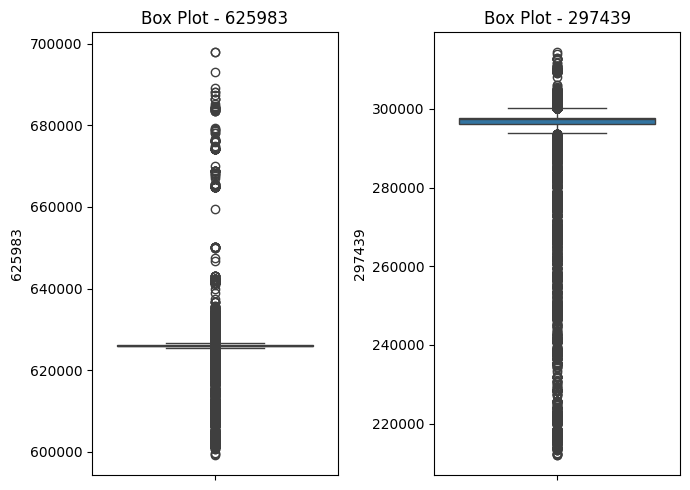

In [13]:
plt.figure(figsize=(7, 5))

# Box plot for the first column
plt.subplot(1, 2, 1)
sns.boxplot(mopsi_df.iloc[:, 0])
plt.title(f'Box Plot - {mopsi_df.columns[0]}')

# Box plot for the second column
plt.subplot(1, 2, 2)
sns.boxplot(mopsi_df.iloc[:, 1])
plt.title(f'Box Plot - {mopsi_df.columns[1]}')

plt.tight_layout()
plt.show()

# 6. Distribution Analysis of Mopsi Data Columns

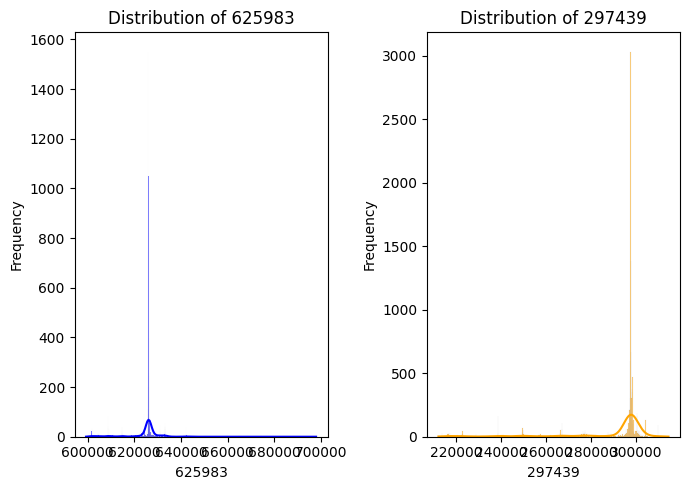

In [10]:
plt.figure(figsize=(7, 5))

# Plot for the first column
plt.subplot(1, 2, 1)
sns.histplot(mopsi_df.iloc[:, 0], kde=True, color='blue')
plt.xlabel(mopsi_df.columns[0])
plt.ylabel('Frequency')
plt.title(f'Distribution of {mopsi_df.columns[0]}')

# Plot for the second column
plt.subplot(1, 2, 2)
sns.histplot(mopsi_df.iloc[:, 1], kde=True, color='orange')
plt.xlabel(mopsi_df.columns[1])
plt.ylabel('Frequency')
plt.title(f'Distribution of {mopsi_df.columns[1]}')

plt.tight_layout()
plt.show()

# 7. Applying K-Mean on Mopsi data

In [26]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_mopsi_scaled)
kmeans.fit(df_mopsi_scaled)

KMeans(n_clusters=4, random_state=42)

# 8. Applying DBSCAN on Mopsi data

In [42]:
np.random.seed(42)
sample_size = min(500, df_mopsi_scaled.shape[0])  # Adjust the sample size

indices = np.random.choice(df_mopsi_scaled.index, size=sample_size, replace=False)
df_mopsi_sample = df_mopsi_scaled.loc[indices]

dbscan = DBSCAN(eps=1.0, min_samples=5)  # Adjust these parameters accordingly
dbscan_labels = dbscan.fit_predict(df_mopsi_sample)
dbscan_score = silhouette_score(df_mopsi_sample, dbscan_labels)

print(f"DBSCAN Silhouette Score: {dbscan_score}")

DBSCAN Silhouette Score: 0.3151491612721189


# 9. Applying Hierrarchical on Mopsi data

In [44]:
#agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
#agg_labels = agg_clustering.fit_predict(df_mopsi_scaled)

np.random.seed(42)
sample_size = min(500, df_mopsi_scaled.shape[0])  # Adjust the sample size

# Assuming your DataFrame has numerical indices
indices = np.random.choice(df_mopsi_scaled.index, size=sample_size, replace=False)
df_mopsi_sample = df_mopsi_scaled.loc[indices]

# Adjust AgglomerativeClustering parameters
hierarchical = AgglomerativeClustering(n_clusters=3)  # Adjust the number of clusters accordingly
agg_labels = hierarchical.fit_predict(df_mopsi_sample)
hierarchical_score = silhouette_score(df_mopsi_sample, agg_labels)

print(f"Hierarchical Silhouette Score: {hierarchical_score}")

Hierarchical Silhouette Score: 0.5773736843274297


# 10. Visualization of K-Means, DBSCAn and Hierarchical

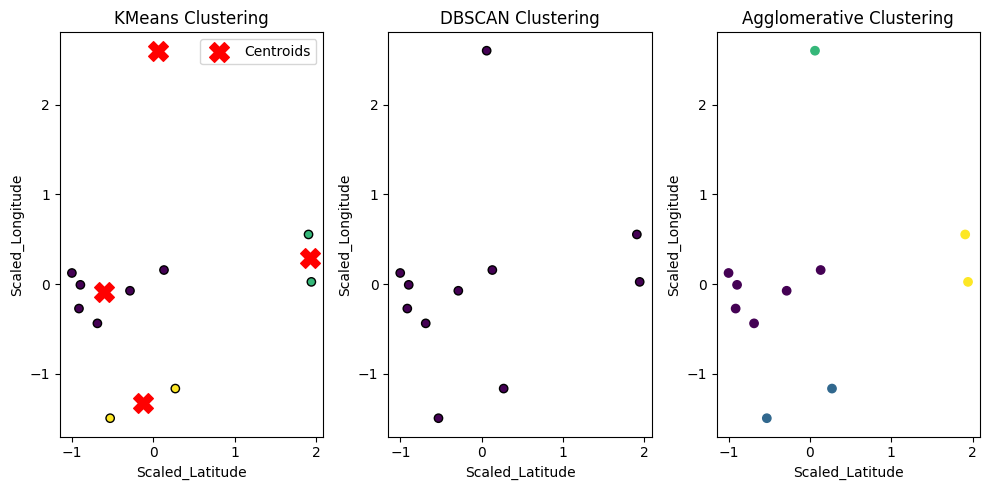

In [32]:
# Visualize KMeans clusters
plt.figure(figsize=(10, 5))

# KMeans plot
plt.subplot(1, 3, 1)
plt.scatter(df_mopsi_scaled.iloc[:, 0], df_mopsi_scaled.iloc[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel(df_mopsi_scaled.columns[0])
plt.ylabel(df_mopsi_scaled.columns[1])
plt.legend()

# DBSCAN plot
plt.subplot(1, 3, 2)
plt.scatter(df_mopsi_scaled.iloc[:, 0], df_mopsi_scaled.iloc[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel(df_mopsi_scaled.columns[0])
plt.ylabel(df_mopsi_scaled.columns[1])

# Hierarchical clustering dendrogram
plt.subplot(1, 3, 3)
plt.scatter(df_mopsi_scaled.iloc[:, 0], df_mopsi_scaled.iloc[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel(df_mopsi_scaled.columns[0])
plt.ylabel(df_mopsi_scaled.columns[1])

plt.tight_layout()
plt.show()

# 11 . Answers for questions mentioned in assignment pdf

- K-Means is good for grouping similar things together. It helps find patterns in data.
- Ensured all tasks are on the same scale. 
- K-Means divided my tasks into groups. Each group got a label, showing which activities are similar.
- Used Silhouette Score to see how well K-Means did. A higher score is indicating clearer groups.